### Reconstruction with a custom network. 
This notebook extends the last notebook to simultaneously train a decoder network, which translates from embedding back into dataspace. It also shows you how to use validation data for the reconstruction network during training.

In [1]:
import os
os.environ["KERAS_BACKEND"] = "torch"

### load data

In [2]:
from torchvision import datasets, transforms

# Download and load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Convert PyTorch tensor to NumPy array
train_images = mnist_train.data.numpy()
train_labels = mnist_train.targets.numpy()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
train_images.shape, train_labels.shape

test_images = mnist_test.data.numpy()
test_images = test_images.reshape((test_images.shape[0], -1))/255.
test_images.shape

(10000, 784)

In [3]:
from umap.parametric_umap import ParametricUMAP

/n/groups/datta/tim_sainburg/conda_envs/parametricumap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
embedder = ParametricUMAP(
    n_training_epochs=1,
    n_components=2,
    n_epochs = 50,
    parametric_reconstruction= True,
    autoencoder_loss = False,
    validation_data=test_images,
    verbose=True,
)
embedding = embedder.fit_transform(train_images)

ParametricUMAP(parametric_reconstruction=True, validation_data=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))
Fri May 17 09:20:46 2024 Construct fuzzy simplicial set
Fri May 17 09:20:46 2024 Finding Nearest Neighbors
Fri May 17 09:20:46 2024 Building RP forest with 17 trees
Fri May 17 09:20:52 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May 17 09:21:05 2024 Finished Nearest Neighbor Search
Fri May 17 09:21:08 2024 Construct embedding
Epoch 1/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - loss: 0.4655 - reconstruction_loss: 0.2356 - umap_loss: 0.2299 - val_loss: 0.8380 - val_reconstruction_loss: 0.1861 - val_umap_loss: 0.6518
Epoch 2/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - loss: 0.3663 - reco

### plot reconstructions

In [5]:
test_images_recon = embedder.inverse_transform(embedder.transform(test_images))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.min(test_images), np.max(test_images)

(0.0, 1.0)

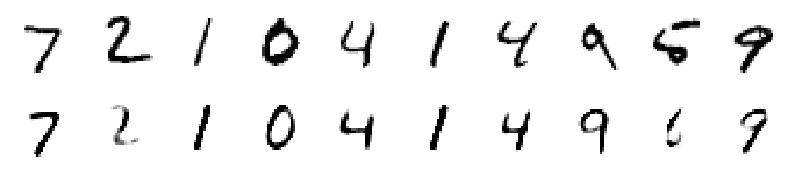

In [8]:
nex = 10
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(nex, 2))
for i in range(nex):
    axs[0, i].matshow(np.squeeze(test_images[i].reshape(28, 28, 1)), cmap=plt.cm.Greys)
    axs[1, i].matshow(
        np.squeeze(test_images_recon[i].reshape(28, 28, 1)),
        cmap=plt.cm.Greys, vmin = 0, vmax = 1
    )
for ax in axs.flatten():
    ax.axis("off")

### plot results

In [9]:
embedding = embedder.transform(train_images)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [10]:
import matplotlib.pyplot as plt

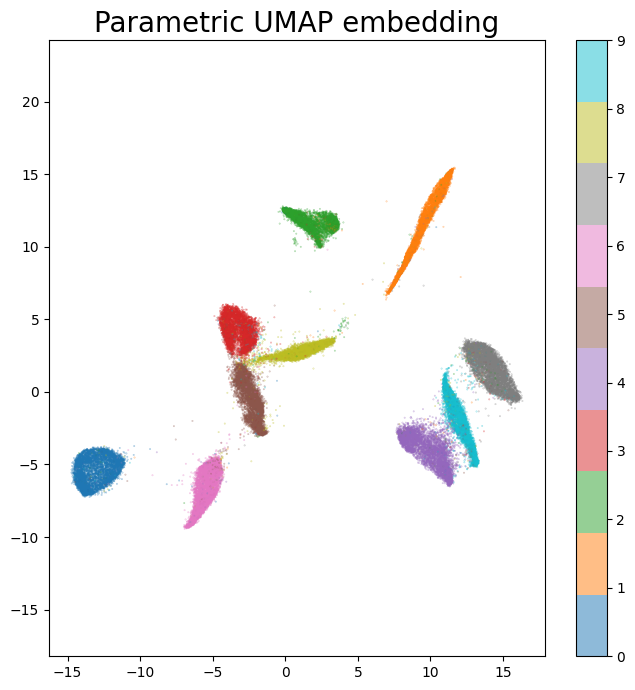

In [11]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_labels.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("Parametric UMAP embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [12]:
embedder._history.keys()

dict_keys(['loss', 'reconstruction_loss', 'umap_loss', 'val_loss', 'val_reconstruction_loss', 'val_umap_loss'])

Text(0.5, 0, 'Epoch')

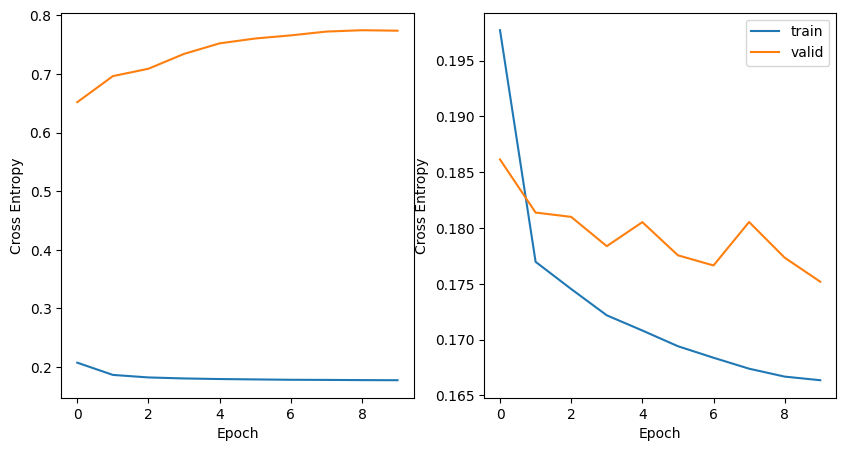

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(embedder._history['umap_loss'])
ax.plot(embedder._history['val_umap_loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

ax = axs[1]
ax.plot(embedder._history['reconstruction_loss'], label='train')
ax.plot(embedder._history['val_reconstruction_loss'], label='valid')
ax.legend()
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

## Repeat as autoencoder

In [14]:
autoencoder_embedder = ParametricUMAP(
    n_training_epochs=1,
    n_components=2,
    n_epochs = 50,
    parametric_reconstruction= True,
    autoencoder_loss = True,
    validation_data=test_images,
    verbose=True,
)

In [15]:
embedding = autoencoder_embedder.fit_transform(train_images)

ParametricUMAP(autoencoder_loss=True, parametric_reconstruction=True, validation_data=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))
Fri May 17 09:34:42 2024 Construct fuzzy simplicial set
Fri May 17 09:34:43 2024 Finding Nearest Neighbors
Fri May 17 09:34:43 2024 Building RP forest with 17 trees
Fri May 17 09:34:44 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May 17 09:34:46 2024 Finished Nearest Neighbor Search
Fri May 17 09:34:47 2024 Construct embedding
Epoch 1/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - loss: 0.4657 - reconstruction_loss: 0.2284 - umap_loss: 0.2373 - val_loss: 0.8433 - val_reconstruction_loss: 0.1776 - val_umap_loss: 0.6657
Epoch 2/10
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/ste

### plot reconstructions

In [16]:
import numpy as np

In [17]:
test_images_recon = autoencoder_embedder.inverse_transform(autoencoder_embedder.transform(test_images))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


NameError: name 'tf' is not defined

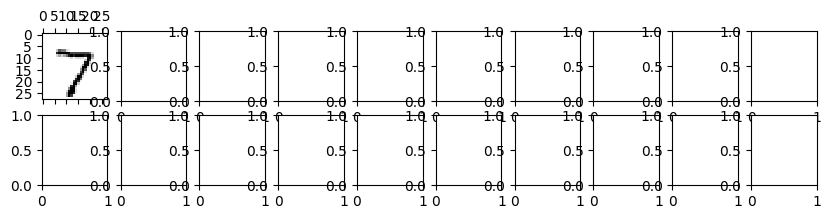

In [18]:
nex = 10
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(nex, 2))
for i in range(nex):
    axs[0, i].matshow(np.squeeze(test_images[i].reshape(28, 28, 1)), cmap=plt.cm.Greys)
    axs[1, i].matshow(
        tf.nn.sigmoid(np.squeeze(test_images_recon[i].reshape(28, 28, 1))),
        cmap=plt.cm.Greys,
    )
for ax in axs.flatten():
    ax.axis("off")

### plot results

In [ ]:
embedding = autoencoder_embedder.embedding_

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=train_labels.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("Parametric UMAP embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [ ]:
embedder._history.keys()

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

ax = axs[1]
ax.plot(embedder._history['reconstruction_loss'], label='train')
ax.plot(embedder._history['val_reconstruction_loss'], label='valid')
ax.legend()
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')